[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
  https://colab.research.google.com/github/blhuillier/MathPhysI/blob/main/Examples/III_DiffEq/Distributions.ipynb
)

# Let's see some properties of ditributions

# Example of Test Function: the Canonical Bump

In distribution theory, **test functions** are smooth functions with compact support.  
The canonical example is the *bump function*:

$$
\phi(t) = 
\begin{cases}
e^{-\frac{1}{1-t^2}}, & |t| < 1, \\\\
0, & \text{else}.
\end{cases}
$$

This function is infinitely differentiable everywhere, and all its derivatives vanish smoothly at the boundary points $t = \pm 1$.

---

## First derivative

For $|t| < 1$,
$$
\phi'(t) = -\frac{2t}{(1-t^2)^2}\,\phi(t).
$$

Outside $[-1,1]$, we have $\phi'(t)=0$.

---

## Second derivative

For $|t| < 1$,
$$
\phi''(t) = \frac{6t^4 - 2}{(1-t^2)^4}\,\phi(t).
$$

Outside $[-1,1]$, we have $\phi''(t)=0$.

---

## Key Properties

- **Compact support**: $\phi$ vanishes outside $[-1,1]$.
- **Smoothness**: $\phi \in C^\infty(\mathbb R)$.
- **Flatness at the boundary**: All derivatives of $\phi$ vanish at $t=\pm 1$.

Thus, $\phi$ is a prototypical test function used to illustrate the space
$$
\mathcal{D}(\mathbb R) = C_c^\infty(\mathbb R).
$$

---


In [6]:
import matplotlib.pyplot as plt
import os 

# TW_PT = 345.0          # <-- paste from LaTeX log
# TW_IN = TW_PT / 72.27  # TeX pt → inches
TW_IN = 4.7778

MyFontSize = 10               # set your target font size (pt)

# --- Apply font size globally ---
plt.rcParams.update({
    "text.usetex": True,     # optional: use LaTeX for text rendering
    "font.size": MyFontSize, # base font size
    "axes.titlesize": MyFontSize,
    "axes.labelsize": MyFontSize,
    "xtick.labelsize": MyFontSize,
    "ytick.labelsize": MyFontSize,
    "legend.fontsize": MyFontSize,
})

# keep the same height:width ratio r (e.g., r = old_height / old_width)
r = 0.62               # <-- set to your target ratio



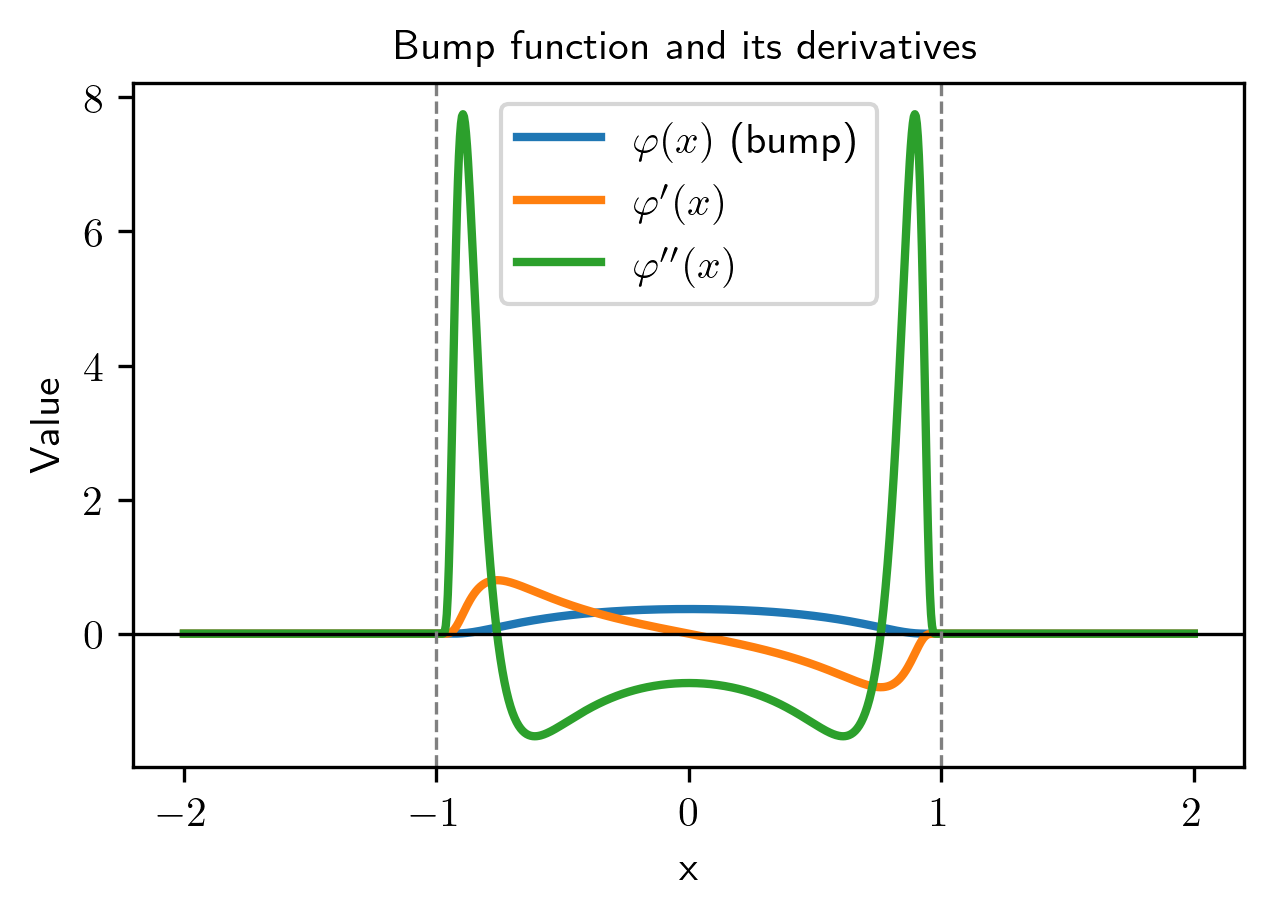

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bump function and its derivatives for |x| < 1
def bump(x):
    mask = np.abs(x) < 1
    y = np.zeros_like(x)
    g = np.zeros_like(x)
    g[mask] = -1.0 / (1 - x[mask]**2)
    y[mask] = np.exp(g[mask])
    return y

def bump_prime(x):
    phi = bump(x)
    mask = np.abs(x) < 1
    y = np.zeros_like(x)
    y[mask] = -(2*x[mask] / (1 - x[mask]**2)**2) * phi[mask]
    return y

def bump_doubleprime(x):
    phi = bump(x)
    mask = np.abs(x) < 1
    y = np.zeros_like(x)
    y[mask] = ((6*x[mask]**4 - 2) / (1 - x[mask]**2)**4) * phi[mask]
    return y

# Plot
x = np.linspace(-2, 2, 1000)
fig = plt.figure(figsize=(TW_IN, TW_IN * r), dpi=300)
plt.plot(x, bump(x), label=r'$\varphi(x)$ (bump)', lw=2)
plt.plot(x, bump_prime(x), label=r"$\varphi'(x)$", lw=2)
plt.plot(x, bump_doubleprime(x), label=r"$\varphi''(x)$", lw=2)

plt.axhline(0, color='black', lw=0.8)
plt.axvline(-1, color='grey', linestyle='--', lw=0.8)
plt.axvline(1, color='grey', linestyle='--', lw=0.8)
plt.legend()
plt.title("Bump function and its derivatives")
plt.xlabel("x")
plt.ylabel("Value")
plt.show()
os.makedirs("img", exist_ok=True)
fig.savefig("img/bump.png", bbox_inches='tight', dpi=300)
